In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("/home/andrey/Загрузки/УД_cl.xlsx")

In [3]:
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,Санкт-Петербург,Мужской,1,"Риск-менеджер (РМ, АР, ГРМ)",4,6,3-5,4,Работа в офисе
1,1,Новосибирск,Женский,2,"Риск-менеджер (РМ, АР, ГРМ)",4,8,3-5,5,Смешанный
2,2,Самара,Мужской,8,"Риск-менеджер (РМ, АР, ГРМ)",4,9,0-3,6,Смешанный
3,3,Воронеж,Женский,12,"Риск-менеджер (РМ, АР, ГРМ)",6,8,3-5,5,Удаленный
4,4,Санкт-Петербург,Женский,8,"Риск-менеджер (РМ, АР, ГРМ)",5,8,0-3,5,Смешанный


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
le.fit(data['Пол'])

LabelEncoder()

In [6]:
list(le.classes_)

['Женский', 'Мужской']

In [7]:
data['Пол'] = le.transform(data['Пол'])

In [8]:
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,Санкт-Петербург,1,1,"Риск-менеджер (РМ, АР, ГРМ)",4,6,3-5,4,Работа в офисе
1,1,Новосибирск,0,2,"Риск-менеджер (РМ, АР, ГРМ)",4,8,3-5,5,Смешанный
2,2,Самара,1,8,"Риск-менеджер (РМ, АР, ГРМ)",4,9,0-3,6,Смешанный
3,3,Воронеж,0,12,"Риск-менеджер (РМ, АР, ГРМ)",6,8,3-5,5,Удаленный
4,4,Санкт-Петербург,0,8,"Риск-менеджер (РМ, АР, ГРМ)",5,8,0-3,5,Смешанный


In [9]:
le.fit(data['Город'])

LabelEncoder()

In [10]:
list(le.classes_)

['Воронеж', 'Москва', 'Новосибирск', 'Самара', 'Санкт-Петербург']

In [11]:
data['Город'] = le.transform(data['Город'])

In [12]:
data['Должность'].value_counts()

Риск-менеджер (РМ, АР, ГРМ)                                             371
Руководитель (начальник Управления, ИД, НО, заместитель начальника)      31
Сотрудник ЦУПиС                                                          24
Name: Должность, dtype: int64

In [13]:
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,4,1,1,"Риск-менеджер (РМ, АР, ГРМ)",4,6,3-5,4,Работа в офисе
1,1,2,0,2,"Риск-менеджер (РМ, АР, ГРМ)",4,8,3-5,5,Смешанный
2,2,3,1,8,"Риск-менеджер (РМ, АР, ГРМ)",4,9,0-3,6,Смешанный
3,3,0,0,12,"Риск-менеджер (РМ, АР, ГРМ)",6,8,3-5,5,Удаленный
4,4,4,0,8,"Риск-менеджер (РМ, АР, ГРМ)",5,8,0-3,5,Смешанный


In [14]:
le.fit(data['Должность'])
list(le.classes_)

['Риск-менеджер (РМ, АР, ГРМ)',
 'Руководитель (начальник Управления, ИД, НО, заместитель начальника) ',
 'Сотрудник ЦУПиС']

In [15]:
data['Должность'] = le.transform(data['Должность'])

In [16]:
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,4,1,1,0,4,6,3-5,4,Работа в офисе
1,1,2,0,2,0,4,8,3-5,5,Смешанный
2,2,3,1,8,0,4,9,0-3,6,Смешанный
3,3,0,0,12,0,6,8,3-5,5,Удаленный
4,4,4,0,8,0,5,8,0-3,5,Смешанный


In [17]:
data['Категория'].value_counts()

5               128
4               107
7                70
6                50
3                40
Не применимо     18
8                 6
9                 5
2                 2
Name: Категория, dtype: int64

In [18]:
data.loc[data['Категория'] == 'Не применимо', 'Категория'] = 0

#df.loc[df['points'] > 10, 'points'] = 20

In [19]:
data['Категория'].value_counts()

5    128
4    107
7     70
6     50
3     40
0     18
8      6
9      5
2      2
Name: Категория, dtype: int64

In [20]:
data['Режим'].value_counts()

Смешанный         244
Удаленный          99
Работа в офисе     83
Name: Режим, dtype: int64

In [21]:
le.fit(data['Режим'])
list(le.classes_)

['Работа в офисе', 'Смешанный ', 'Удаленный']

In [22]:
data['Режим'] = le.transform(data['Режим'])
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,4,1,1,0,4,6,3-5,4,0
1,1,2,0,2,0,4,8,3-5,5,1
2,2,3,1,8,0,4,9,0-3,6,1
3,3,0,0,12,0,6,8,3-5,5,2
4,4,4,0,8,0,5,8,0-3,5,1


In [23]:
le.fit(data['Сверхнорма'])
list(le.classes_)

['0-3', '10-15', '3-5', '5-10', 'Более 15', 'Ухожу вовремя']

In [24]:
data['Сверхнорма'] = le.transform(data['Сверхнорма'])

In [25]:
data.loc[data['Сверхнорма'] == 5, 'Сверхнорма'] = 99
data.loc[data['Сверхнорма'] == 4, 'Сверхнорма'] = 5
data.loc[data['Сверхнорма'] == 3, 'Сверхнорма'] = 4
data.loc[data['Сверхнорма'] == 2, 'Сверхнорма'] = 3
data.loc[data['Сверхнорма'] == 1, 'Сверхнорма'] = 2
data.loc[data['Сверхнорма'] == 0, 'Сверхнорма'] = 1
data.loc[data['Сверхнорма'] == 99, 'Сверхнорма'] = 0

In [26]:
data.head()

,Unnamed: 0,Город,Пол,Стаж,Должность,Категория,Самодостаточность,Сверхнорма,Балланс,Режим
0,0,4,1,1,0,4,6,3,4,0
1,1,2,0,2,0,4,8,3,5,1
2,2,3,1,8,0,4,9,1,6,1
3,3,0,0,12,0,6,8,3,5,2
4,4,4,0,8,0,5,8,1,5,1


In [27]:
data['Балланс'].value_counts()

5                       74
3                       61
6                       59
4                       51
7                       43
8                       36
2                       31
1                       19
Затрудняюсь ответить    19
9                       14
10                      10
0                        9
Name: Балланс, dtype: int64

In [28]:
data.loc[data['Балланс'] == 'Затрудняюсь ответить', 'Балланс'] = 11 

In [29]:
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

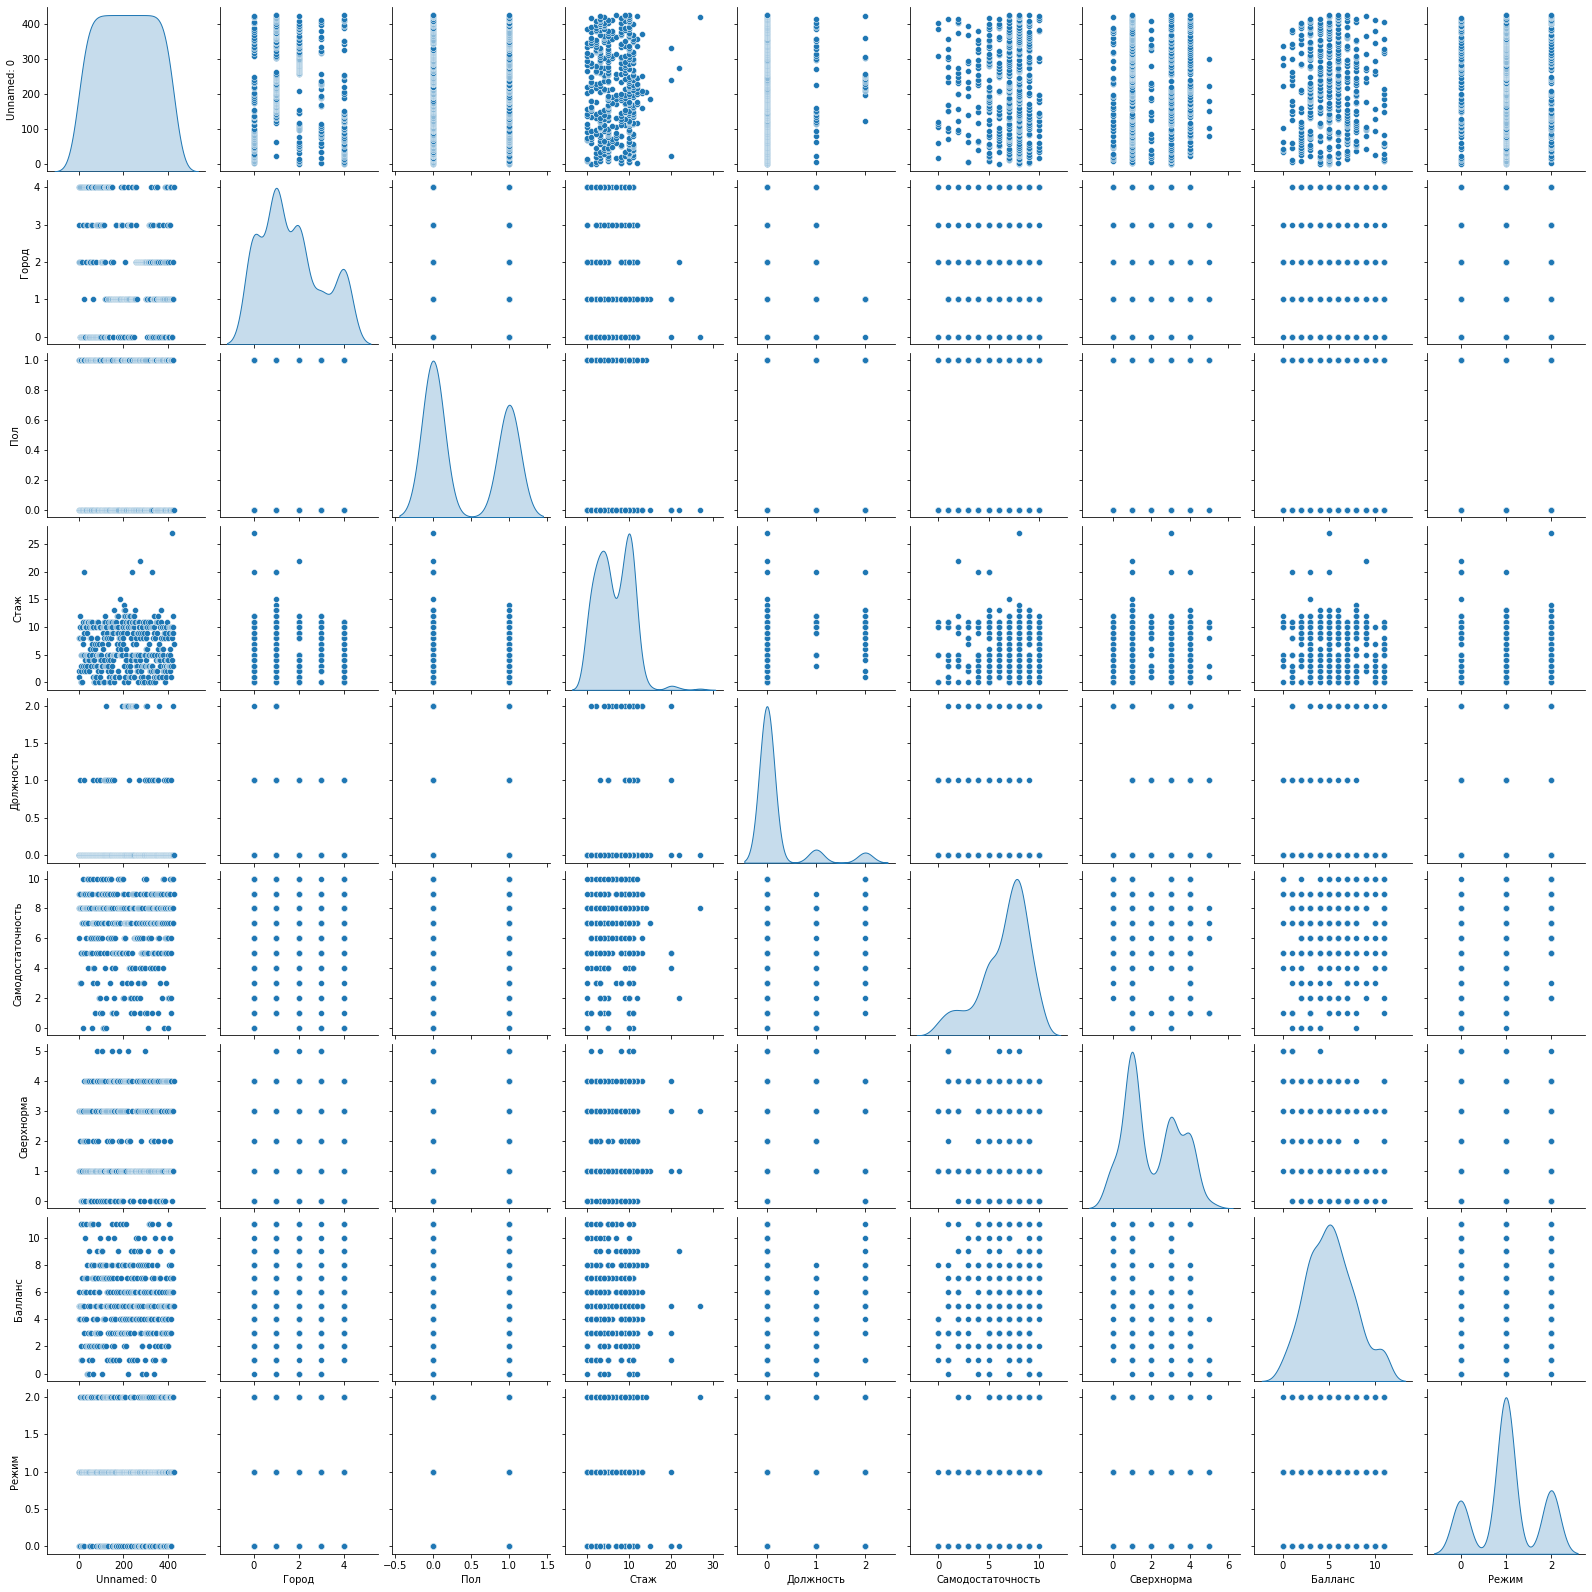

In [30]:
sns.pairplot(data, diag_kind='kde')

In [32]:
X = data[["Город", "Пол", "Стаж", "Должность", 'Категория', 'Самодостаточность', 'Сверхнорма', 'Балланс']]
y = data['Режим']

In [33]:
print(X.shape, y.shape)

(426, 8) (426,)


In [31]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import graphviz 

In [48]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=1)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [49]:
clf.score(X_test, y_test)

0.5327102803738317

[Text(0.5, 0.75, 'Самодостаточность <= 7.5\nentropy = 1.391\nsamples = 319\nvalue = [61, 187, 71]'),
 Text(0.25, 0.25, 'entropy = 1.207\nsamples = 175\nvalue = [50, 112, 13]'),
 Text(0.75, 0.25, 'entropy = 1.302\nsamples = 144\nvalue = [11, 75, 58]')]

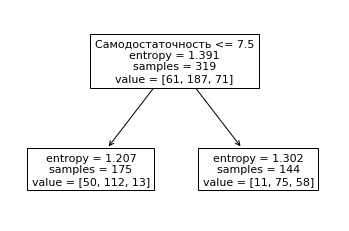

In [50]:
plot_tree(clf, feature_names = X.columns) 